<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labourious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not?
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [6]:
import pandas as pd
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"

# Download the dataset
response = requests.get(url)

# Save the file locally
with open("blood_transfusion.csv", "wb") as file:
    file.write(response.content)


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [8]:
df=pd.read_csv("blood_transfusion.csv")


- R (Recency - months since last donation)
- F (Frequency - total number of donation)
- M (Monetary - total blood donated in c.c.)
- T (Time - months since first donation
- binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [11]:
new_column_names = {
    'Recency (months)': 'Recency',
    'Frequency (times)': 'Frequency',
    'Monetary (c.c. blood)': 'Monetary',
    'Time (months)': 'Time',
    'whether he/she donated blood in March 2007': 'Target'}
          
df.rename(columns=new_column_names, inplace=True)

In [12]:
df.shape

(748, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Target     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [14]:
# All ints
# Seems no null

In [15]:
# check for missing data
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
Target,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [17]:
# 12500 ml of blood donated!!  Anomaly.
# Maybe think about 'capping' the data

In [18]:
# What about duplicates
df.duplicated().sum()

215

In [19]:
df[df.duplicated()]

,Recency,Frequency,Monetary,Time,Target
18,2,6,1500,15,1
20,2,3,750,4,1
23,2,6,1500,16,1
32,4,10,2500,28,1
43,2,5,1250,16,0
...,...,...,...,...,...
735,23,1,250,23,0
736,23,1,250,23,0
737,23,1,250,23,0
738,23,1,250,23,0


In [20]:
#df.drop_duplicates()  Not going to drop the duplicates as it is very possible for two people to have the same data.

In [21]:
# Check target incidence as a proportion using normalize=True
df.Target.value_counts(normalize=True).round(2)

Target
0    0.76
1    0.24
Name: proportion, dtype: float64

In [22]:
# 76% of donors did not donate blood during the next visit of the mobile donation vehicle.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

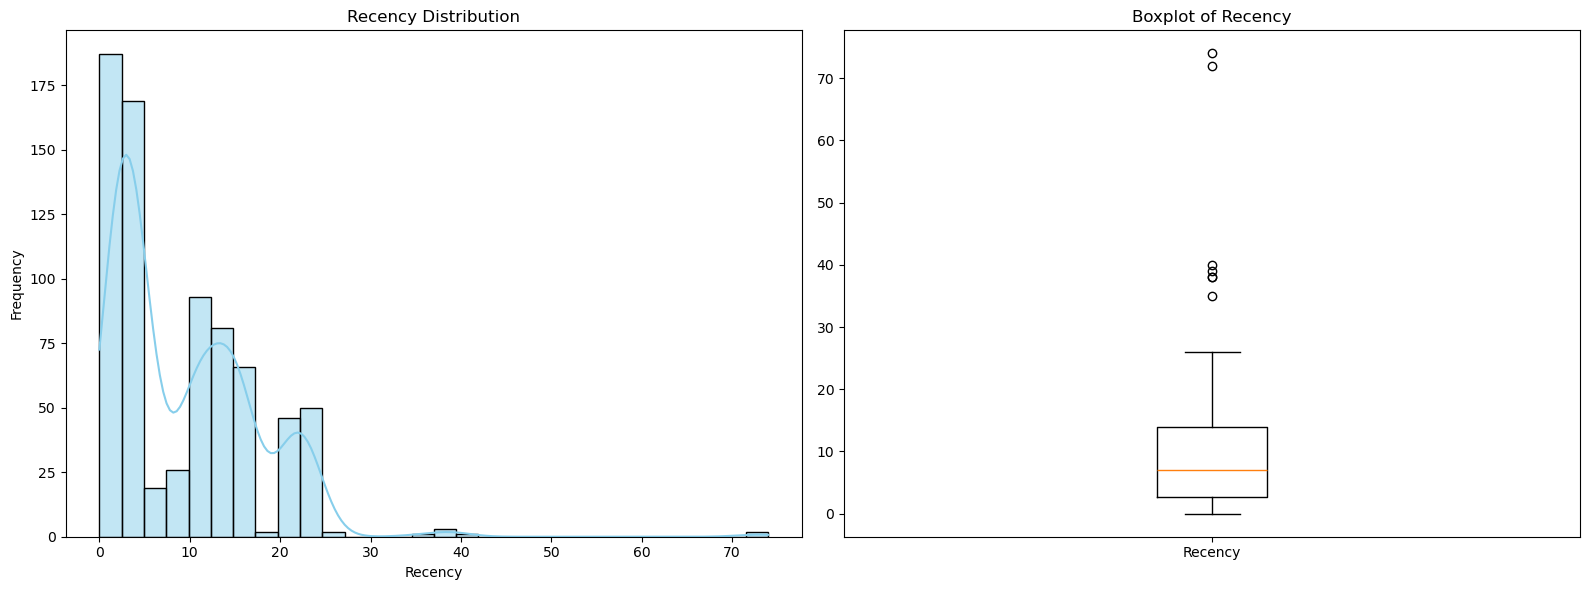

In [24]:
# histplot and boxplot of recency
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Recency'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Recency Distribution')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Recency'])
axes[1].set_xticklabels(['Recency'])
axes[1].set_title('Boxplot of Recency')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [25]:
# Possible outliers or just anomalies 

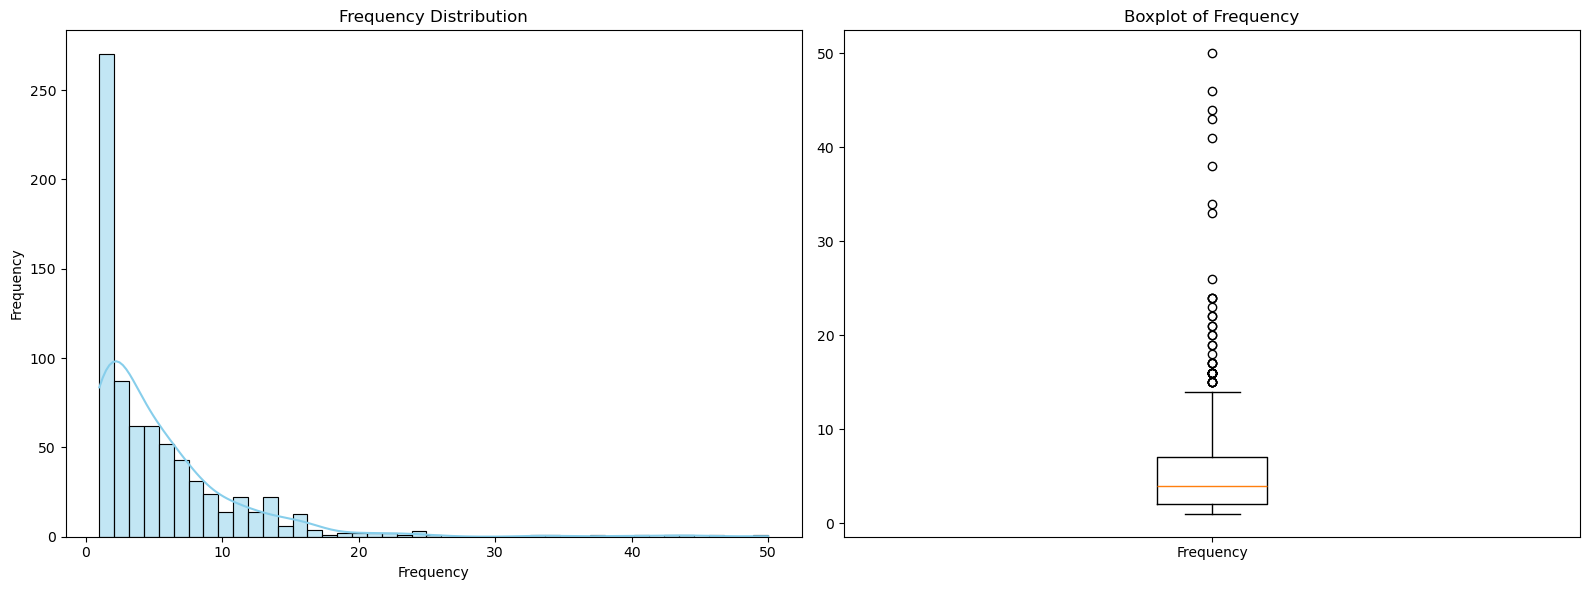

In [26]:
# histplot and boxplot of frequency
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Frequency'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency Distribution')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Frequency'])
axes[1].set_xticklabels(['Frequency'])
axes[1].set_title('Boxplot of Frequency')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [27]:
# Possible outliers or just anomalies 

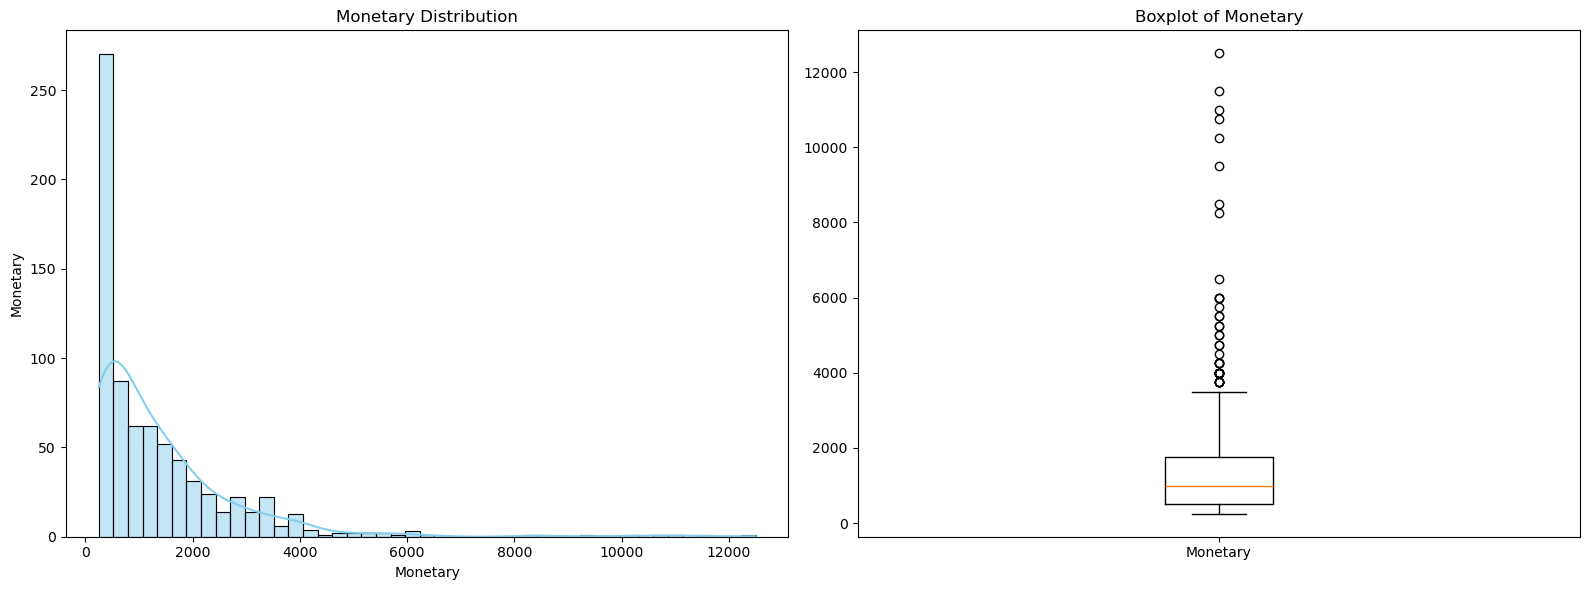

In [28]:
# histplot and boxplot of monetary
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Monetary'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Monetary')
axes[0].set_ylabel('Monetary')
axes[0].set_title('Monetary Distribution')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Monetary'])
axes[1].set_xticklabels(['Monetary'])
axes[1].set_title('Boxplot of Monetary')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [29]:
# Anomalies?

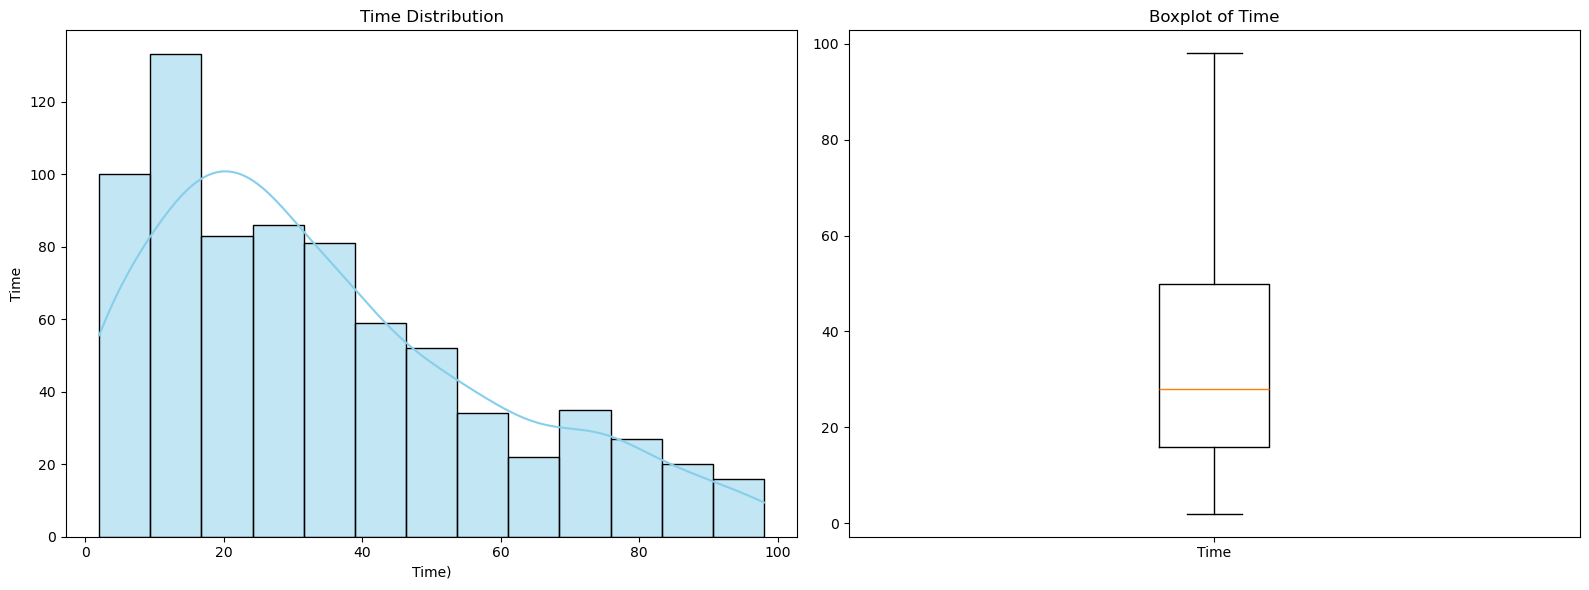

In [30]:
# histplot and boxplot of time
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Time'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Time)')
axes[0].set_ylabel('Time')
axes[0].set_title('Time Distribution')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Time'])
axes[1].set_xticklabels(['Time'])
axes[1].set_title('Boxplot of Time')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

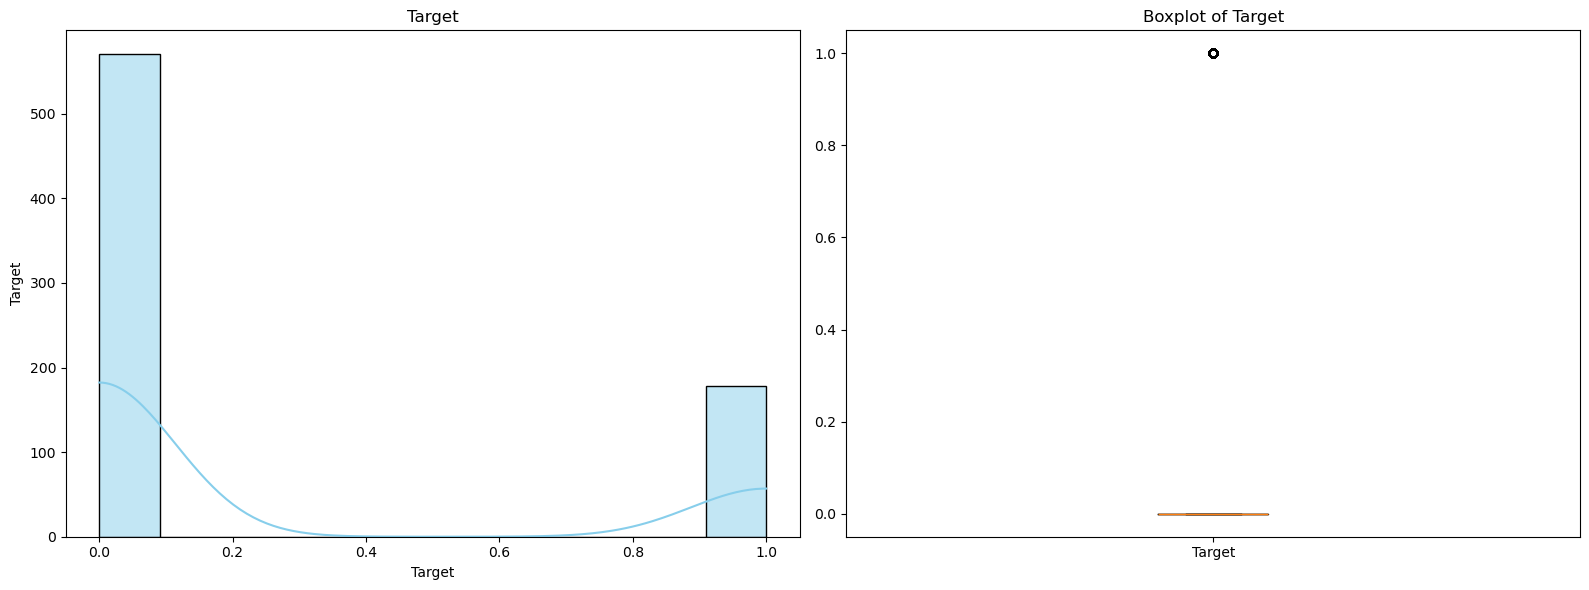

In [31]:
# histplot and boxplot of Target
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Target'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Target')
axes[0].set_title('Target')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Target'])
axes[1].set_xticklabels(['Target'])
axes[1].set_title('Boxplot of Target')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

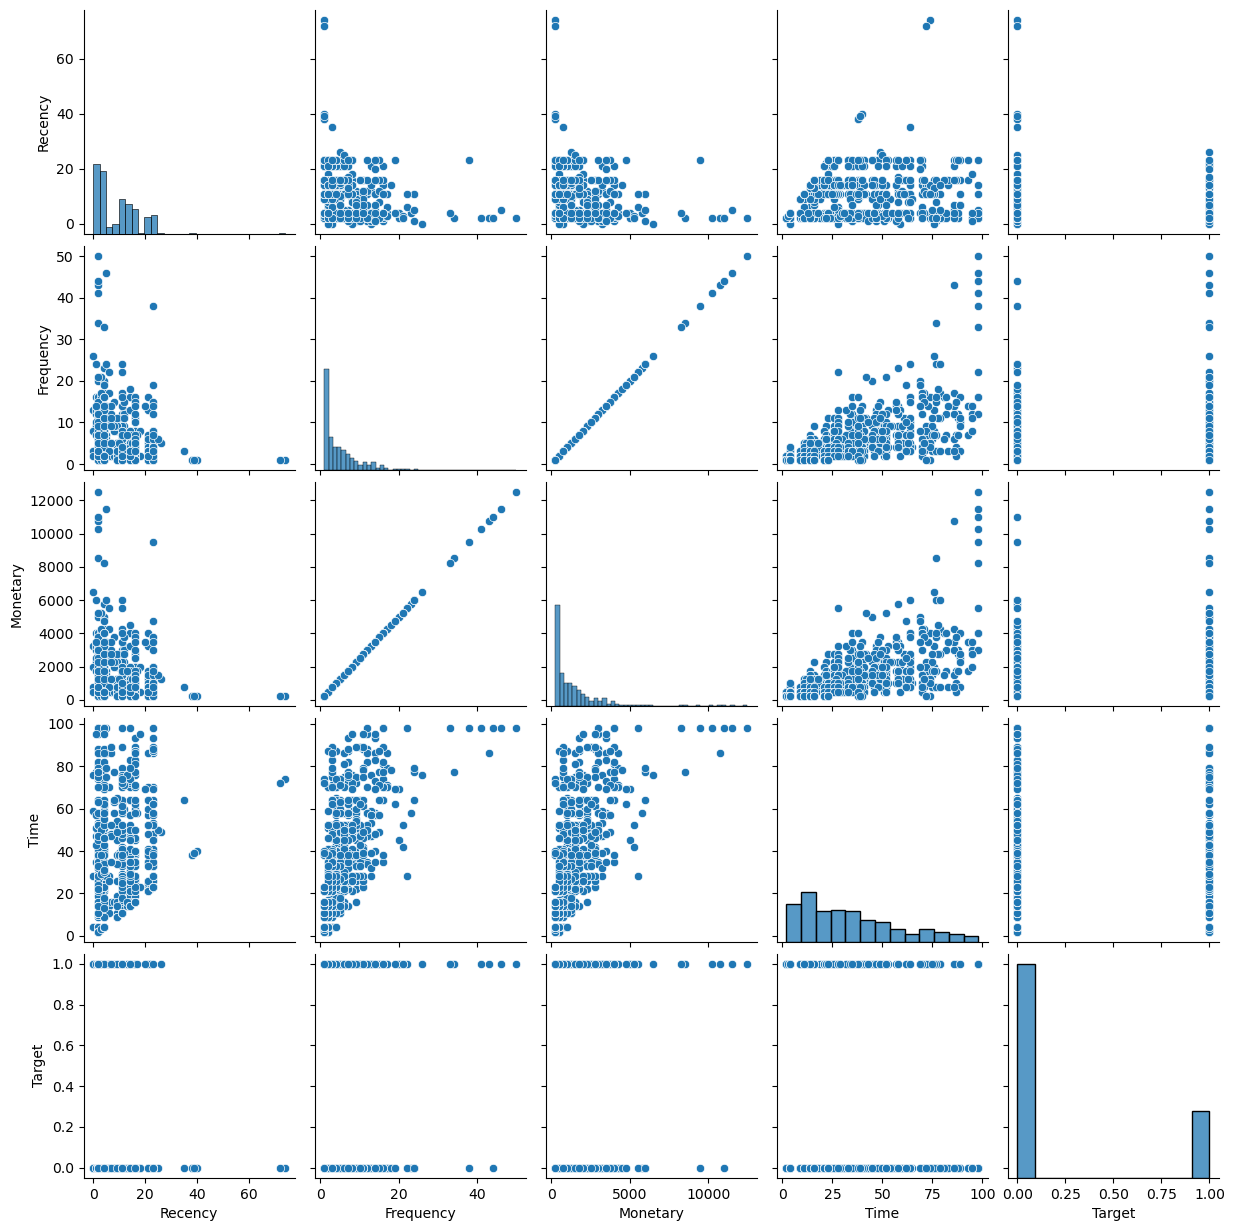

In [32]:
sns.pairplot(df)

<Axes: >

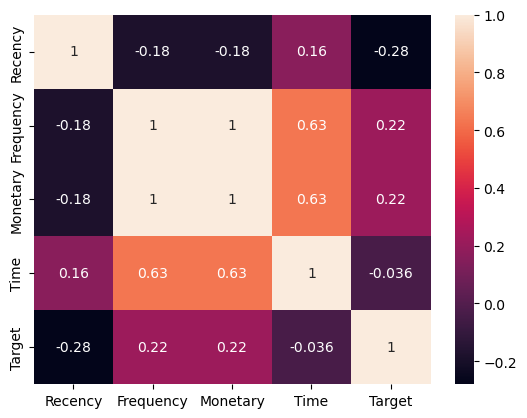

In [33]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr,annot=True)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [36]:
df.shape

(748, 5)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [V ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [V ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [39]:
X = df.drop(columns = 'Target')
y=df['Target']

In [40]:
X.shape

(748, 4)

In [41]:
y.shape

(748,)

In [42]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [44]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)


# Step 9: Fit the Model

In [46]:
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [48]:
# Check accuracy of fitting against the training data
# Predict on the training data
y_train_pred = tree.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {training_accuracy:.2f}")

Training Accuracy: 0.94


In [49]:
# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

Confusion Matrix:
[[456   1]
 [ 36 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       457
           1       0.99      0.74      0.85       141

    accuracy                           0.94       598
   macro avg       0.96      0.87      0.91       598
weighted avg       0.94      0.94      0.93       598



In [50]:
# Accuracy of 0.94 is a bit concerning given the outliers / anomalies were not handled.  Could suggest overfitting.

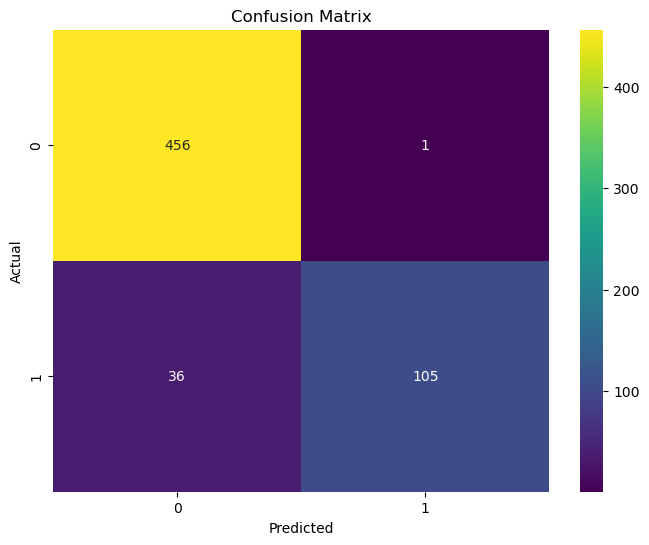

In [51]:
# Visualise the Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

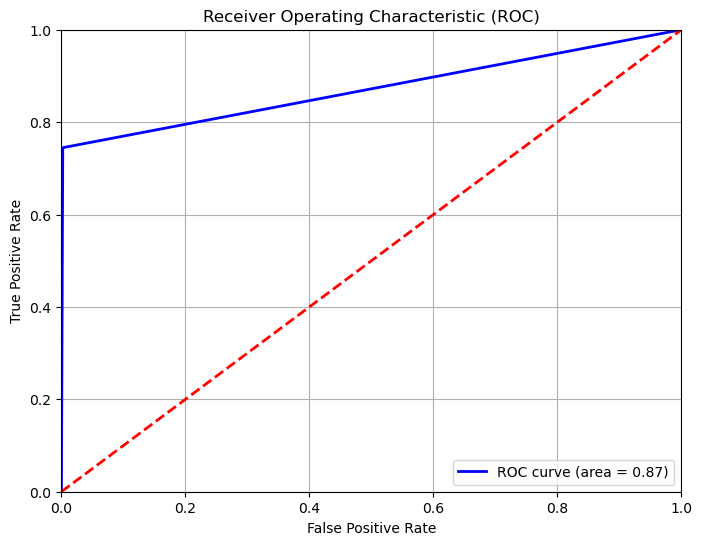

In [52]:
# Look at the ROC curve

from sklearn import metrics  # Import the metrics module
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _= metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [53]:
# I used default settings for hyper-parameters
# Use Grid Search to determine best parameters and score

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best Score: {grid_search.best_score_:.2f}")



Best Parameters:
{'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.79


In [55]:
# Predict on the training data
y_train_pred_grid = grid_search.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred_grid)

print(f"Training Accuracy: {training_accuracy:.2f}")

Training Accuracy: 0.80


In [56]:
#columns_to_check = ['x', 'y', 'z', 'depth', 'table']

#df = df.copy()
#def detect_outliers(df, columns):
    #outliers = {}
   # for column in columns:
       # Q1 = df[column].quantile(0.25)
      #  Q3 = df[column].quantile(0.75)
       # IQR = Q3 - Q1
       # lower_bound = Q1 - 1.5 * IQR
       # upper_bound = Q3 + 1.5 * IQR
       # outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
   #return outliers

#outliers = detect_outliers(df, columns_to_check)
#outliers_count = sum(len(outlier_values) for outlier_values in outliers.values())
#outliers_count

In [57]:
#df_below_1000 = df[df['Monetary (c.c. blood)'] < 1000]

# Display the filtered DataFrame
#print(df_below_1000.head(10))

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [59]:
# Predict with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [60]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy with best parameters: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       113
           1       0.63      0.32      0.43        37

    accuracy                           0.79       150
   macro avg       0.72      0.63      0.65       150
weighted avg       0.77      0.79      0.76       150

Confusion Matrix:
[[106   7]
 [ 25  12]]


In [61]:
# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[106   7]
 [ 25  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       113
           1       0.63      0.32      0.43        37

    accuracy                           0.79       150
   macro avg       0.72      0.63      0.65       150
weighted avg       0.77      0.79      0.76       150



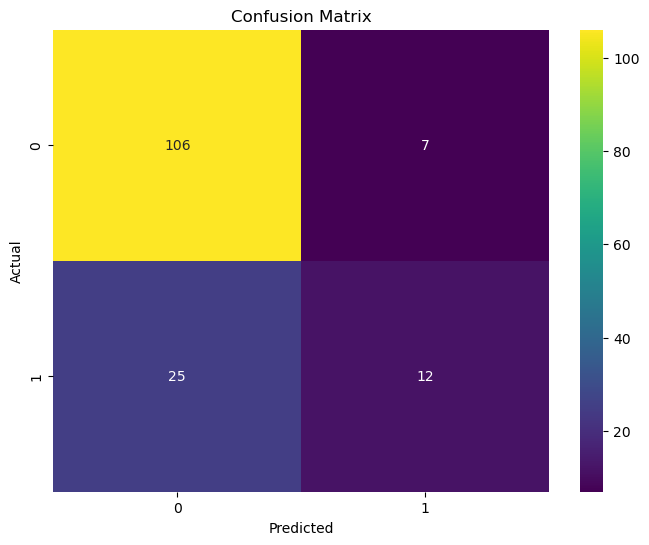

In [62]:
# Visualise the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

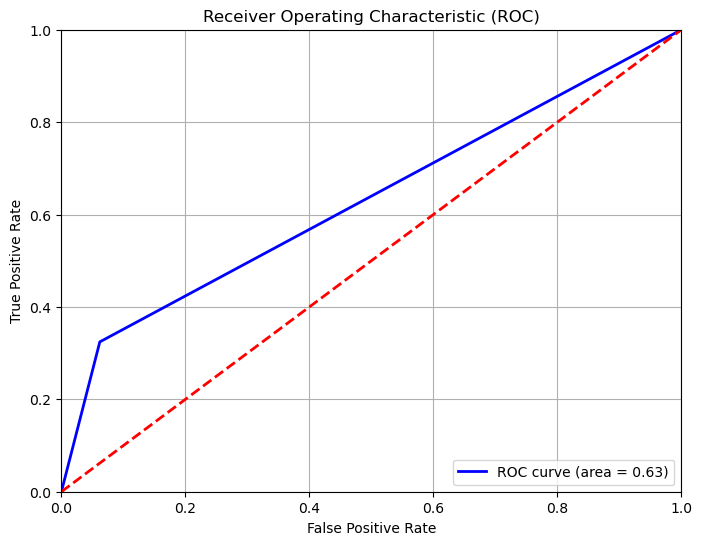

In [63]:
# Look at the ROC curve

from sklearn import metrics  # Import the metrics module
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [64]:
# Out of interest, was the original model over-fitting?

y_tree_pred = tree.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_tree_pred)

print(f"Testing Accuracy: {test_accuracy:.2f}")

Testing Accuracy: 0.65


In [65]:
# Yep!!

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [67]:
#The model has met the minimum standards of:
#- Accuracy = 0.6895 - achieved 0.79
#- ROC AUC = 0.5690 - achieved 0.63

In [68]:

# Create a DataFrame with a single row of synthetic data
fake_data = pd.DataFrame({
    'Recency': [6.0],  
    'Frequency': [3.0],  
    'Monetary': [750],
    'Time': [30] 
})

In [69]:
# Make prediction for the single instance
prediction = best_model.predict(fake_data)

# Output the prediction
print("Prediction for the fake data:", prediction)

Prediction for the fake data: [0]


In [70]:
# No.  Not likely to donate blood in Mar 2007

In [ ]:
# Model could be further refined by dealing with some of the potential outliers, however they could be true anomalies.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



